In [16]:
import os
import sys
import pandas as pd
import censusdis
from censusdis import data
import censusdis.data as ced

In [17]:
acs5_profile = "acs/acs5/profile"
year = 2021 # 2021 ACS 5-year estimates
all_states = "*"
all_counties = "*" 

    acs5_geography = "acs/acs5/geography"
    acs5_tags = "acs/acs5/tags"
    acs5_groups = "acs/acs5/groups"
    acs5_variables = "acs/acs5/variables"

Census Data API: https://api.census.gov/data/2021/acs/acs5/profile/variables.html 

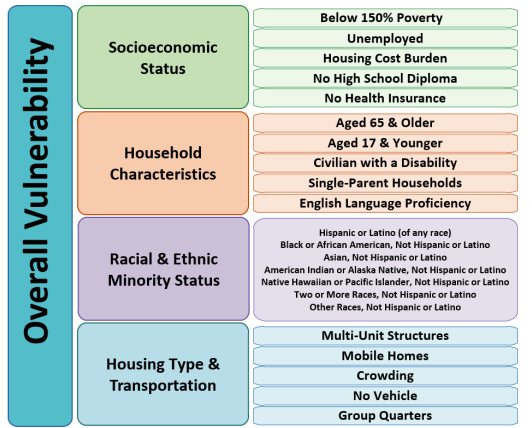
Raw data estimates and percentages for each variable, for each tract, are included in the database. In addition, 
the margins of error (MOEs) for each estimate, at the Census Bureau standard of 90%, are also included. 
Confidence intervals can be calculated by subtracting the MOE from the estimate (lower limit) and adding the 
MOE to the estimate (upper limit). Because of relatively small sample sizes, some of the MOEs are high. It is 
important to identify the amount of error acceptable in any analysis.

In [47]:
var_map = {
  "DP02_0060PE": "ed_lt9", # Percent of educational attainment less than 9th grade
  "DP02_0061PE": "ed_9_12", # Percent of educational attainment 9th to 12th grade, no diploma
  "DP02_0062PE": "ed_hs", # Percent of educational attainment high school graduate (includes equivalency) 
  "DP02_0063PE": "ed_sc", # Percent of educational attainment some college, no degree
  "DP02_0064PE": "ed_asc", # Percent of educational attainment associate's degree
  "DP02_0065PE": "ed_b", # Percent of educational attainment bachelor's degree
  "DP02_0066PE": "ed_gr", # Percent of educational attainment graduate or professional degree
  "DP03_0128PE": "ses_pov", # Percent of all people whose income in past 12 is below poverty level
  "DP04_0058PE": "tp_veh_0", # Percent of occupied housing units with no vehicles available
  "DP02_0154PE": "dg_bb_int", # Percent of households with internet (Broadband) subscription
}
vars = ["NAME"] + list(var_map.keys())

df = ced.download(acs5_profile, year, vars, state = all_states, county = all_counties)
df = df.rename(columns=var_map)
df.columns = map(str.lower, df.columns)

display(df.head(20), df.shape)

,state,county,name,ed_lt9,ed_9_12,ed_hs,ed_sc,ed_asc,ed_b,ed_gr,ses_pov,tp_veh_0,dg_pc,dg_bb_int,disabled,language
0,01,001,"Autauga County, Alabama",2.0,8.4,32.8,19.6,9.1,16.4,11.7,13.6,5.4,92.2,85.5,75.1,1.9
1,01,003,"Baldwin County, Alabama",2.1,6.9,27.4,21.7,9.5,20.6,11.8,9.2,2.4,93.7,87.9,84.5,3.1
2,01,005,"Barbour County, Alabama",7.4,16.9,36.7,20.5,7.3,6.7,4.4,26.5,11.2,82.5,64.6,45.5,4.8
3,01,007,"Bibb County, Alabama",6.2,13.3,43.9,18.0,6.7,7.9,4.0,16.9,6.3,84.3,74.6,75.9,0.5
4,01,009,"Blount County, Alabama",6.8,9.6,35.1,21.5,12.1,9.3,5.6,13.2,4.5,87.2,81.0,92.5,3.5
5,01,011,"Bullock County, Alabama",6.4,16.0,41.3,19.2,5.4,8.1,3.5,30.9,13.0,80.8,59.4,24.8,4.9
6,01,013,"Butler County, Alabama",3.8,10.6,45.2,18.7,7.6,8.1,5.9,18.2,5.6,84.0,76.3,51.6,1.0
7,01,015,"Calhoun County, Alabama",4.3,10.5,34.6,23.2,7.9,11.4,8.1,17.5,6.0,90.3,81.6,72.8,2.4
8,01,017,"Chambers County, Alabama",6.0,11.2,36.2,23.1,9.8,9.6,4.1,15.1,6.7,87.9,77.1,56.9,0.7
9,01,019,"Cherokee County, Alabama",7.3,12.8,36.9,19.5,10.6,6.2,6.6,15.0,3.6,84.4,76.7,91.5,1.4


(3221, 16)

,ed_lt9,ed_9_12,ed_hs,ed_sc,ed_asc,ed_b,ed_gr,ses_pov,tp_veh_0,dg_pc,dg_bb_int
ed_lt9,1.000000,0.502658,0.052921,-0.243381,-0.369976,-0.376853,-0.288054,0.365069,0.174500,-0.360099,-0.347745
ed_9_12,0.502658,1.000000,0.415225,-0.198203,-0.395851,-0.692839,-0.495802,0.646392,0.251621,-0.584387,-0.598511
ed_hs,0.052921,0.415225,1.000000,-0.218229,-0.149195,-0.773855,-0.705362,0.300412,0.101417,-0.545069,-0.506938
ed_sc,-0.243381,-0.198203,-0.218229,1.000000,0.209080,-0.046212,-0.228291,-0.107334,-0.212197,0.176846,0.079812
ed_asc,-0.369976,-0.395851,-0.149195,0.209080,1.000000,0.081435,-0.099532,-0.309738,-0.208265,0.164578,0.201535
ed_b,-0.376853,-0.692839,-0.773855,-0.046212,0.081435,1.000000,0.767824,-0.517463,-0.156364,0.640156,0.632961
ed_gr,-0.288054,-0.495802,-0.705362,-0.228291,-0.099532,0.767824,1.000000,-0.297971,0.025014,0.520367,0.527057
ses_pov,0.365069,0.646392,0.300412,-0.107334,-0.309738,-0.517463,-0.297971,1.000000,0.456947,-0.583032,-0.607279
tp_veh_0,0.174500,0.251621,0.101417,-0.212197,-0.208265,-0.156364,0.025014,0.456947,1.000000,-0.251016,-0.243441
dg_pc,-0.360099,-0.584387,-0.545069,0.176846,0.164578,0.640156,0.520367,-0.583032,-0.251016,1.000000,0.869122


<Axes: xlabel='ed_lt9', ylabel='dg_bb_int'>

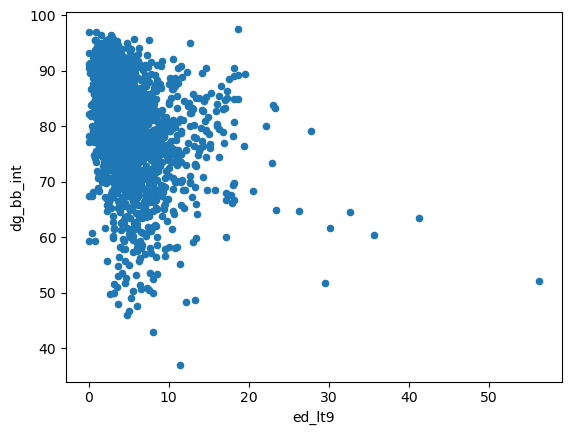

In [44]:
display(df.iloc[:,3:15].corr().style.background_gradient(cmap='plasma'))
display(df.plot.scatter(x='ed_lt9', y='dg_bb_int'))